In [10]:
# 6.189 Lecture 6 (From MIT OCW)
# point.py

class Point:
    # A class that represents a 2D Point

    def __init__(self, x, y):
        # Initalization method, called when we create
        #  a Point. Takes 2 arguments, x and y,
        #  that must be numbers

        # Make 2 object attributes
        self.x = x
        self.y = y

    def __str__(self):
        # The point's string method. When you print an object,
        #  the __str__ method is called
        return "A Point at coordinates " + str((self.x, self.y))

    def move_point(self, delta_x, delta_y):
        # Moves this Point delta_x units in the x-direction
        #  and delta_y units in the y direction.
        # delta_x and delta_y must be numbers.
        # Returns the new coordinates.
        self.x += delta_x
        self.y += delta_y
        return Point(self.x, self.y)

    def move_point_incorrect(self, delta_x, delta_y):
        # An incorrect implementation of move_point, because
        #  we do not change the _attributes_ self.x and self.y;
        #  instead, we only change a local variable x and y.

        x = self.x
        y = self.y

        x += delta_x
        y += delta_y

        return (x, y)


# Creating a Point object. What method is called?
myPoint = Point(7, 4)
# When we ask to print an object, its __str__ method is called
##print "After initializing the Point:", myPoint

# We want to permanently move the point, but this method
#  does that incorrectly because it does not change the 
#  object's attribute; it only alters a local variable
##print myPoint.move_point_incorrect(-1, 5)
##print "After moving the Point incorrectly:", myPoint

# Moving the point permanently works now because this method
#  alters the object's attributes, which permanently changes
#  them!
#print myPoint.move_point(-1, 5)
#print "After moving the Point correctly:", myPoint


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#This looks to be only post-processing type of filter.
#We need to give an entire data to filter it.

#We also need a on-line filter class.
#This would be a useful class that can form a basis for Kalman filter class that I am planning to write. 

class MyFilters:   
    
    def __init__(self,input_data,filt_type,corner_frequency,Ts):
        self.input_data = input_data;
        self.filt_type = filt_type;
        self.corner_frequency = corner_frequency;
        self.sampling_period = Ts;
        
    def __str__(self):
        return "Class with %s filtering option to be applied on given input data " %(self.filt_type) + " at %s Hz corner frequency"  %(self.corner_frequency) + " and %s sampling period" %(self.sampling_period);

    def input_size(self):
        return len(self.input_data);
    
    def filt(self,order):
        if(order == 1):
            if(self.filt_type=='lowpass'):
                y = 0;
                filt_out=[]
                for i in range(0,len(self.input_data)):
                    y = y + self.corner_frequency*self.sampling_period*(self.input_data[i] - y)
                    filt_out.append(y);
                return filt_out
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
        elif(order == 2):
            if(self.filt_type == 'lowpass'):
                x1=0; x2=0;
                filt_out=[];
                for i in range(0,len(self.input_data)):
                    x1 = x1 + self.sampling_period*x2;
                    x2 = x2 - self.sampling_period*(self.corner_frequency**2*x1 + 2*self.corner_frequency*x2 - self.corner_frequency**2*self.input_data[i])
                    filt_out.append(x1);
                return filt_out
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
            
        else:
            print("Highest order filter = 2, please input the filter order as 1 or 2\n")
            return 1
    
    
    

    

In [ ]:
t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.1*np.sin(2*np.pi*1000*t) 

for i in range(0,len(u)):
    a = MyFilters(u[i],'lowpass',2*np.pi*250,0.000001);
    b = a.filt(2);
    
    
    
    
    
    
    
    

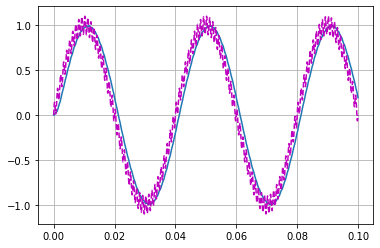

In [12]:
t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.1*np.sin(2*np.pi*1000*t) 

a = MyFilters(u,'lowpass',2*np.pi*250,0.000001)

b = a.filt(2)

plt.plot(t,b)
plt.plot(t,a.input_data,'--m')
plt.grid('on')

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# This is an online filter. Keep reading the input and filtering out the output.

# As of now, we have first and second order low pass filters whose corner frequency can be adjusted.



class MyFilters:   
    
    def __init__(self,state, input_data,filt_type,corner_frequency,Ts):
        self.input_data = input_data;
        self.state = state; #Can be a list or a numpy array/matrix
        self.filt_type = filt_type;
        self.corner_frequency = corner_frequency;
        self.sampling_period = Ts;
        
    def __str__(self):
        return "Class with %s filtering option to be applied on given input data " %(self.filt_type) + " at %s Hz corner frequency"  %(self.corner_frequency) + " and %s sampling period" %(self.sampling_period);

    def state_size(self):
        return len(self.state);
    
    def filt(self,state,order):
        if(order == 1):
            if(self.filt_type=='lowpass'):
                filt_out=[]; #state=float(state);
                state = state + self.corner_frequency*self.sampling_period*(self.input_data - state)
                filt_out.append(state);
                return filt_out
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
        elif(order == 2):
            if(self.filt_type == 'lowpass'):
                x1 = self.state[0]; x2 = self.state[1];
                filt_out=[];
                x1 = x1 + self.sampling_period*x2;
                x2 = x2 - self.sampling_period*(self.corner_frequency**2*x1 + 2*self.corner_frequency*x2 - self.corner_frequency**2*self.input_data)
                filt_out.append(x1);
                return [x1,x2]
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
            
        else:
            print("Highest order filter = 2, please input the filter order as 1 or 2\n")
            return 1  
    

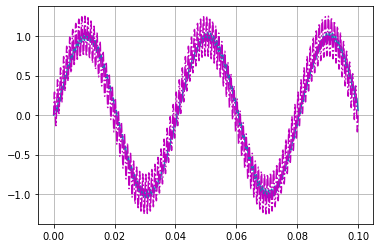

In [51]:
# Second order filter trial

x=np.array([0.0,0.0])

t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.25*np.sin(2*np.pi*1000*t) 

a = MyFilters(x,u[0],'lowpass',2*np.pi*500.0,0.000001);

b_vec=[]

for i in range(0,len(u)):
    a.input_data = u[i]
    a.state = a.filt(a.state,2)
    b_vec.append(a.state[0])

plt.plot(t,b_vec)
plt.plot(t,u,'-.m')
plt.grid('on')    
    

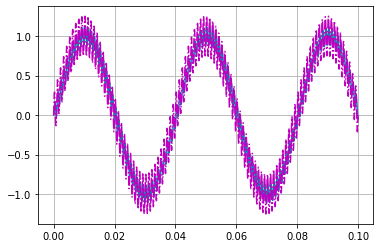

In [56]:
# First order filter trial

x=np.array([0.0])

t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.25*np.sin(2*np.pi*1000*t) 

a = MyFilters(x,u[0],'lowpass',2*np.pi*500.0,0.000001);

b_vec=[]

for i in range(0,len(u)):
    a.input_data = u[i]
    a.state = a.filt(a.state,1)
    b_vec.append(a.state[0])

plt.plot(t,b_vec)
plt.plot(t,u,'-.m')
plt.grid('on')    
    

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# This is an online filter. Keep reading the input and filtering out the output.

# As of now, we have first and second order low pass filters whose corner frequency can be adjusted.



class MyFilters:   
    
    def __init__(self,state, input_data,filt_type,corner_frequency,Ts):
        self.input_data = input_data;
        self.state = state; #Can be a list or a numpy array/matrix
        self.filt_type = filt_type;
        self.corner_frequency = corner_frequency;
        self.sampling_period = Ts;
        
    def __str__(self):
        return "Class with %s filtering option to be applied on given input data " %(self.filt_type) + " at %s Hz corner frequency"  %(self.corner_frequency) + " and %s sampling period" %(self.sampling_period);

    def state_size(self):
        return len(self.state);
    
    def filt(self,order):
        if(order == 1):
            if(self.filt_type=='lowpass'):
                #filt_out=[]; #state=float(state);
                self.state = self.state + self.corner_frequency*self.sampling_period*(self.input_data - self.state)
                return self.state
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
        elif(order == 2):
            if(self.filt_type == 'lowpass'):
                #x1 = self.state[0]; x2 = self.state[1];
                #filt_out=[];
                self.state[0] = self.state[0] + self.sampling_period*self.state[1];
                self.state[1] = self.state[1] - self.sampling_period*(self.corner_frequency**2*self.state[0] + 2*self.corner_frequency*self.state[1] - self.corner_frequency**2*self.input_data)
                #filt_out.append(x1);
                return self.state
            else:
                print("Presently, we work with first order filter only, Sorry.\n")
                return 1
            
        else:
            print("Highest order filter = 2, please input the filter order as 1 or 2\n")
            return 1  
    

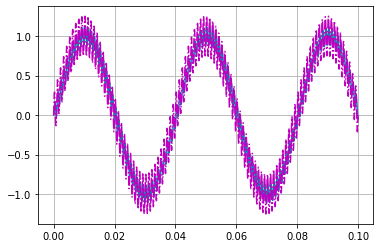

In [91]:
# First order filter trial

x=np.array([0.0])

t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.25*np.sin(2*np.pi*1000*t) 

a = MyFilters(x,u[0],'lowpass',2*np.pi*500.0,0.000001);

b_vec=[]

for i in range(0,len(u)):
    a.input_data = u[i]
    y = a.filt(1)
    b_vec.append(y)

# type(b_vec)    
plt.plot(t,b_vec)
plt.plot(t,u,'-.m')
plt.grid('on')    

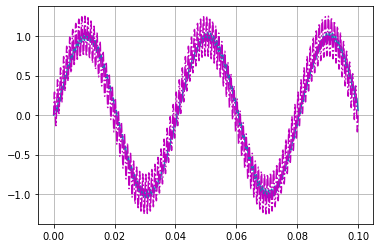

In [88]:
# Second order filter trial

x=np.array([0.0,0.0])

t=np.arange(0,0.1,0.000001)

u = np.sin(2*np.pi*25*t) + 0.25*np.sin(2*np.pi*1000*t) 

a = MyFilters(x,u[0],'lowpass',2*np.pi*500.0,0.000001);

b_vec=[]

for i in range(0,len(u)):
    a.input_data = u[i]
    y = a.filt(2)
    b_vec.append(y[0])

plt.plot(t,b_vec)
plt.plot(t,u,'-.m')
plt.grid('on')    

  

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import random



%matplotlib qt

class Kalman_Filt:
    def __init__(self,x,A,B,P,Q,H,R,z,u,w):
        self.x = x;
        self.A = A;
        self.B = B;
        self.P = P;
        self.Q = Q;
        self.R = R;
        self.H = H;
        self.z = z;
        self.u = u; # Input
        self.w = w; # Measurement noise
        
        
    def __str__(self):
        return "Linear Kalman filter implementation\n"
    
    
    def Predictor_Phase(self,P,Q,R,u):
        self.x = self.A*self.x + self.B*self.u;
        self.P = self.A*self.P*self.A.T + self.Q;
        Ka = self.H*self.P*self.H.T + self.R;
        K = self.P*self.H.T*Ka.I;
        
        return K
    
    def Corrector_Phase(self,K,z):
        residual = z - self.H*self.x;
        self.x = self.x + K*residual;
        self.P = self.P - K*self.H*self.P
        
    def State_Evolution_Practical(self,xp,w,u):
        xp = self.A*xp + self.B*u
        zp = self.H*xp + w
        return xp

In [153]:
A1 = np.matrix([[1.0,1.0],[0,1.0]])
B1 = np.matrix([[-1.0],[-1.0]])
H1 = np.matrix([1.0,0.0])

P = np.eye(2)
Q = np.matrix([[0.0,0.0],[0.0,0.0]])

R = 1

#State and measurement initializations
z=0;
x=np.matrix([[0],[0]])
u=1;

sim_size = 100
w = np.random.normal(0,R,sim_size)

kf = Kalman_Filt(x,A1,B1,P,Q,H1,R,z,u,w);

zf = []; # Filtered measurement
zp=[]

xp = np.matrix([[0],[0]])

for i in range(0,sim_size):
    #Getting actual measurements with noise
    
    xp = kf.State_Evolution_Practical(xp,w[i],u)
    dummy = float(xp[0])
    zp.append(dummy)
    
    K = kf.Predictor_Phase(P,Q,R,u)
    kf.Corrector_Phase(K,zp[i])
    
    d2 = float(kf.x[0])
    zf.append(d2)

plt.plot(zf)
plt.plot(zp,'-.m')

In [38]:
# Trying class with subclasses = inheritence.

import numpy as np

class matrix1:
    def __init__(self,matrix):
        self.matrix = matrix
            
    def matrix_sum():
        sum=0
        for i in self.matrix:
            sum = sum + i;
        return sum 
    
class m_vector(matrix1):
    def __init__(self,matrix1,vec_index):
        self.matrix = matrix1.matrix       
        self.vec = matrix1.matrix[vec_index]





In [42]:
x=np.matrix([[1,2],[4,5]])
am = matrix1(x)

av = m_vector(am,(0,0))
av.vec


1

In [138]:
class shoe:
    def __init__(self,color,brand):
        self.color = color;
        self.brand = brand;
        
    def __str__(self):
        return ("shoe with brand %s" %(self.brand) +" and color as %s" %(self.color))
    
    def PoshBrandCheck(self):
        if(self.brand == 'adidas' or self.brand == 'nike'):
            return "Shoes are Posh"
        else:
            return "Cattle class, sorry"

        
class CombatBoot(shoe):
    def __init__(self,brand,color,branch,geography):
        self.branch = branch;
        self.geography = geography
        super(CombatBoot,self).__init__(brand,color)
        
class Combat2(shoe):
    def __init__(self,brand,color,pattern,heels):
        self.pattern = pattern
        self.heels = heels;
        super(Combat2,self).__init__(brand,color)


# Main class is simple definition - intuitive as well
# Subclass takes main class as argument in definition only. The actual arguments are defined in init. The inherited arguments/attributes
# will have to be declared using super(SubClassName,self).__init__(MainclassAttrubutes)

# Functions are defined by default. That is subclasses inherit all the functions of the superclass.

In [144]:
c2 = Combat2(bsh.brand,bsh.color,'stripe',False)

c2.color

'adidas'

In [129]:
bsh = shoe('brown','adidas')
y=CombatBoot('white','lulu','Tokyo','Hills')

print(bsh.PoshBrandCheck())
print(y.PoshBrandCheck())

type(bsh)

Shoes are Posh
Cattle class, sorry


__main__.shoe

In [159]:
class Address:
    def __init__(self, street, num):
        self.street_name = street
        self.number = num

class CampusAddress(Address):
    Address.street_name = 'Mass Ave'
    Address.number = '77'
    def __init__(self,office_number):
        self.office_number = office_number;
        #self.street_name = 'Mass Ave'
        #self.number = '77'
    
        
        


y=CampusAddress("oo-A904")

y.office_number
y.number
#print(y.street_name)

'77'

In [165]:
class Spell:
    def __init__(self, incantation, name):
        self.name = name
        self.incantation = incantation
    def __str__(self):
        return self.name + '' + self.incantation + '\n' + self.get_description()
    def get_description(self):
        return 'No description'
    def execute(self):
        print(self.incantation)

class Accio(Spell):
    def __init__(self):
        Spell.__init__(self, 'Accio', 'Summoning Charm')

class Confundo(Spell):
    def __init__(self):
        Spell.__init__(self, 'Confundo', 'Confundus Charm')

    def get_description(self):
        return 'Causes the victim to become confused and befuddled.'

def study_spell(spell):
    print(spell)











In [169]:
spell = Accio()

study_spell(Confundo())

Confundus CharmConfundo
Causes the victim to become confused and befuddled.
